#Grupo A: Predicción de la Mortalidad Hospitalaria en Pacientes con Sepsis

---



##  Universidad de Barcelona
### Curso:  Organitzación i Gestión de la Información y Conocimientos Clínicos
### Barcelona, actualización Junio 2025
####Maria Chamorro Doganoc, Marc Gregoris Brugué y Irene Olivero Martínez

# **¿Qué es la Sepsis?**
La sepsis es una respuesta del cuerpo a una infección que puede causar daño a los órganos y tejidos. En la sepsis, el cuerpo libera una gran cantidad de sustancias químicas en el torrente sanguíneo, que desencadenan una reacción en cadena que puede llevar a un daño generalizado. Este daño puede provocar fallos orgánicos y, en casos graves, la sepsis puede ser fatal. La sepsis se considera una emergencia médica y requiere tratamiento inmediato.

Cualquier tipo de infección, desde una simple infección de las vías urinarias hasta una neumonía grave, puede desencadenar sepsis. Sin embargo, ciertas infecciones tienen un mayor riesgo de llevar a la sepsis, como las infecciones abdominales, urinarias, respiratorias y de la piel. Las personas más vulnerables a la sepsis son aquellas con sistemas inmunológicos debilitados, como los adultos mayores, personas con enfermedades crónicas (como diabetes), pacientes con cáncer o que han recibido un trasplante de órganos.


**¿Cómo se desarolla la Sepsis?**
Cuando el cuerpo se enfrenta a una infección, el sistema inmunológico responde para intentar eliminar el patógeno. Sin embargo, en algunos casos, el cuerpo responde de forma descontrolada, liberando una gran cantidad de sustancias químicas para combatir la infección. Esto puede causar una inflamación generalizada que daña los vasos sanguíneos y los órganos vitales, como los riñones, el corazón, los pulmones y el hígado.

**Síntomas de la Sepsis**
Los síntomas de la sepsis pueden desarrollarse rápidamente y, a menudo, se presentan en los primeros días de la infección. Los signos más comunes incluyen:

- Fiebre o temperatura corporal baja
- Frecuencia cardíaca elevada
- Respiración rápida o dificultad para respirar
- Confusión o dificultad para pensar claramente
- Dolor o malestar generalizado, especialmente en el abdomen o el pecho
- Presión arterial baja (que puede provocar mareos o desmayos)
- Piel fría y húmeda, o la piel puede presentar manchas moradas

Los síntomas varían según la gravedad de la sepsis y el lugar de la infección. Si la sepsis no se trata a tiempo, puede llevar a un shock séptico, donde la presión arterial cae peligrosamente, y los órganos del cuerpo empiezan a fallar.

**Factores de riesgo**
Existen varios factores que pueden aumentar el riesgo de desarrollar sepsis, como:

- Infecciones recientes (especialmente infecciones graves como neumonía, infecciones urinarias o abdominales)
- Hospitalización, particularmente en unidades de cuidados intensivos
- Sistema inmunológico debilitado, por ejemplo, debido a enfermedades como VIH, diabetes, cáncer o el uso de medicamentos inmunosupresores
- Edad avanzada o muy joven (bebés y niños pequeños)
- Lesiones graves o cirugía que comprometen la barrera protectora de la piel o los órganos internos

**¿Cómo se trata la Sepsis?**
La sepsis es tratada con urgencia en un entorno hospitalario. El tratamiento principal consiste en:

1. Antibióticos: Para eliminar la infección subyacente.
2. Líquidos intravenosos: Para estabilizar la presión arterial y mantener la circulación sanguínea adecuada.
3. Medicamentos vasopresores: Para elevar la presión arterial si es necesario.
4. Oxígeno o ventilación mecánica: Para aquellos con dificultad respiratoria grave.
5. Cirugía: Si es necesario eliminar el tejido dañado o el foco de infección.

**Prevención de la Sepsis**
Aunque no siempre se puede prevenir, hay medidas que pueden reducir el riesgo de desarrollar sepsis:

- Vacunarse contra enfermedades como la neumonía y la gripe.
- Tratar infecciones a tiempo: Recibir atención médica adecuada y tomar los antibióticos prescritos.
- Lavar las manos y mantener buenas prácticas de higiene para prevenir infecciones.
- Atención inmediata a heridas o quemaduras, y limpiar las lesiones de forma adecuada.


# **Objetivo del Modelo**

En esta Jupyter Notebook, desarrollamos un sistema de machine learning capaz de identificar pacientes en riesgo de mortalidad por sepsis a partir de datos clínicos recolectados durante su estancia en la UCI. La sepsis es una condición médica crítica, y su detección oportuna puede salvar vidas. El propósito es asistir al equipo médico con alertas automáticas basadas en modelos predictivos entrenados con datos reales de pacientes.

Además de entrenar modelos, este sistema está diseñado para generar una acción automática (como un mensaje SMS o administración de tratamiento) si el paciente se encuentra en alto riesgo, como sería en un sistema real implementado en hospitales.

# Importándo las librerías requeridas

In [ ]:
# ===============================
# Librerías estándar y utilidades
# ===============================
import os
import random

# ===============================
# Ciencia de datos y visualización
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import plotly.express as px
import plotly.graph_objects as go
import cv2  # para procesamiento de imágenes

# ===============================
# Scikit-learn: preprocesamiento, modelos y métricas
# ===============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve,
    matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score,
    log_loss, brier_score_loss, average_precision_score
)

# ===============================
# XGBoost
# ===============================
import xgboost as xgb
from xgboost import XGBClassifier

# ===============================
# TensorFlow / Keras (Redes neuronales)
# ===============================
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===============================
# Guardado y carga de modelos
# ===============================
import joblib

#Conexión a la Base de Datos MIMIC-IV



In [ ]:
# Activar e instalar BigQuery
!pip install -q google-cloud-bigquery db-dtypes

from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='compelling-weft-455510-b4')  # Reemplaza con tu ID de proyecto

#Consulta SQL para extraer datos de pacientes con sepsis

In [ ]:
query = """
WITH sofa_raw AS (
  SELECT
    ce.subject_id,
    ce.icustay_id,
    ce.charttime,
    MAX(CASE WHEN ce.itemid = 51265 THEN ce.valuenum END) AS platelets,
    MAX(CASE WHEN ce.itemid = 50885 THEN ce.valuenum END) AS bilirubin,
    MAX(CASE WHEN ce.itemid = 50912 THEN ce.valuenum END) AS creatinine,
    MAX(CASE WHEN ce.itemid = 220052 THEN ce.valuenum END) AS mean_bp,
    MAX(CASE WHEN ce.itemid = 223900 THEN ce.valuenum END) AS gcs_total,
    MAX(CASE WHEN ce.itemid IN (220045, 211, 226763, 226764) THEN ce.valuenum END) AS heart_rate,
    MAX(CASE WHEN ce.itemid IN (220050, 51, 220051, 6701, 225309, 442, 455, 224167, 227243) THEN ce.valuenum END) AS systolic_bp,
    MAX(CASE WHEN ce.itemid IN (220179, 8368, 8555, 225310, 8440, 8441, 224643, 227242) THEN ce.valuenum END) AS diastolic_bp,
    MAX(CASE WHEN ce.itemid IN (220210, 225158) THEN ce.valuenum END) AS lactate_level,
    MAX(CASE WHEN ce.itemid IN (1542,220545, 220546, 861, 1127, 226779, 226780) THEN ce.valuenum END) AS wbc_count,
    MAX(CASE WHEN ce.itemid IN (225145, 225097, 225976, 225977, 224191, 227955, 612) THEN ce.valuenum END) AS fluid_balance
  FROM `compelling-weft-455510-b4.mimic5.chartevents` ce
  WHERE ce.itemid IN (
    51265, 50885, 50912, 220052, 223900,
    220045, 211, 226763, 226764,
    220050, 51,220051, 6701, 225309, 442, 455, 224167, 227243,
    220179, 8368, 8555, 225310, 8440, 8441, 224643, 227242,
    220210,225158,
    1542,220545, 220546, 861, 1127, 226779, 226780,
    225145, 225097, 225976, 225977, 224191, 227955, 612
  )
  GROUP BY ce.subject_id, ce.icustay_id, ce.charttime
),
sofa_score_calc AS (
  SELECT
    subject_id,
    icustay_id,
    charttime,
    CASE
      WHEN platelets < 20 THEN 4
      WHEN platelets < 50 THEN 3
      WHEN platelets < 100 THEN 2
      WHEN platelets < 150 THEN 1
      ELSE 0
    END AS sofa_coag,
    CASE
      WHEN bilirubin >= 12 THEN 4
      WHEN bilirubin >= 6 THEN 3
      WHEN bilirubin >= 2 THEN 2
      WHEN bilirubin >= 1.2 THEN 1
      ELSE 0
    END AS sofa_liver,
    CASE
      WHEN creatinine >= 5 THEN 4
      WHEN creatinine >= 3.5 THEN 3
      WHEN creatinine >= 2 THEN 2
      WHEN creatinine >= 1.2 THEN 1
      ELSE 0
    END AS sofa_renal,
    CASE
      WHEN systolic_bp < 70 THEN 4
      WHEN systolic_bp BETWEEN 70 AND 90 THEN 3
      WHEN systolic_bp BETWEEN 90 AND 110 THEN 2
      WHEN systolic_bp BETWEEN 110 AND 130 THEN 1
      ELSE 0
    END AS sofa_cv_bp,
    CASE
      WHEN heart_rate > 130 THEN 1
      ELSE 0
    END AS sofa_cv_hr,
    CASE
      WHEN gcs_total < 6 THEN 4
      WHEN gcs_total < 10 THEN 3
      WHEN gcs_total < 13 THEN 2
      WHEN gcs_total < 15 THEN 1
      ELSE 0
    END AS sofa_cns,
    CASE
      WHEN lactate_level >= 4 THEN 2
      WHEN lactate_level >= 2 THEN 1
      ELSE 0
    END AS lactate_score,
    CASE
      WHEN wbc_count < 4 OR wbc_count > 12 THEN 1
      ELSE 0
    END AS wbc_score,
    CASE
      WHEN fluid_balance >= 2000 THEN 2
      WHEN fluid_balance BETWEEN 1000 AND 1999 THEN 1
      WHEN fluid_balance BETWEEN -500 AND 999 THEN 0
      WHEN fluid_balance BETWEEN -1000 AND -501 THEN 1
      WHEN fluid_balance < -1000 THEN 2
      ELSE 0
    END AS fluid_balance_score
  FROM sofa_raw
),
final_scores AS (
  SELECT
    subject_id,
    icustay_id,
    charttime,
    sofa_coag,
    sofa_liver,
    sofa_renal,
    sofa_cv_bp,
    sofa_cv_hr,
    sofa_cns,
    lactate_score,
    wbc_score,
    fluid_balance_score,
    (
      COALESCE(sofa_coag, 0) +
      COALESCE(sofa_liver, 0) +
      COALESCE(sofa_renal, 0) +
      COALESCE(sofa_cv_bp, 0) +
      COALESCE(sofa_cv_hr, 0) +
      COALESCE(sofa_cns, 0) +
      COALESCE(lactate_score, 0) +
      COALESCE(wbc_score, 0) +
      COALESCE(fluid_balance_score, 0)
    ) AS sofa_total_extended
  FROM sofa_score_calc
),
final_with_mortality AS (
  SELECT
    fs.*,
    a.hospital_expire_flag
  FROM final_scores fs
  LEFT JOIN `compelling-weft-455510-b4.mimic5.admissions` a
    ON fs.subject_id = a.subject_id
)
SELECT *
FROM final_with_mortality
WHERE sofa_total_extended >= 1
ORDER BY subject_id, icustay_id, charttime
LIMIT 100000;
"""

#Preprocesamiento

✅ Datos cargados correctamente desde BigQuery

📏 Shape of df: (36650, 14)
📋 Columnas disponibles:
['subject_id', 'icustay_id', 'charttime', 'sofa_coag', 'sofa_liver', 'sofa_renal', 'sofa_cv_bp', 'sofa_cv_hr', 'sofa_cns', 'lactate_score', 'wbc_score', 'fluid_balance_score', 'sofa_total_extended', 'hospital_expire_flag']

🔍 Primeras filas:
   subject_id  icustay_id           charttime  sofa_coag  sofa_liver  \
0       10006      206504 2164-10-23 22:40:00          0           0   
1       10006      206504 2164-10-23 23:00:00          0           0   
2       10006      206504 2164-10-24 00:00:00          0           0   
3       10006      206504 2164-10-24 01:00:00          0           0   
4       10006      206504 2164-10-24 02:00:00          0           0   

   sofa_renal  sofa_cv_bp  sofa_cv_hr  sofa_cns  lactate_score  wbc_score  \
0           0           2           0         0              0          0   
1           0           2           0         0              0          0

<ipython-input-10-d85a87e05ac3>:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[f].fillna(mean_val, inplace=True)  # Imputa nulos con media


✅ Random Forest model saved to rf_model_mortality.joblib

✅ Random Forest model loaded successfully



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📈 Resultados de Modelos:



,Accuracy,F1 Score,Precision,Recall,Specificity,AUC ROC,Matthews CC,Cohen Kappa,Balanced Accuracy,Log Loss,Brier Score
Modelo,,,,,,,,,,,
Random Forest,0.8649,0.6667,1.0000,0.5000,1.0000,0.7759,0.6495,0.5934,0.7500,0.4772,0.1550
XGBoost,0.8649,0.6667,1.0000,0.5000,1.0000,0.7315,0.6495,0.5934,0.7500,0.5027,0.1677
Regresión Logística,0.7297,0.5000,0.5000,0.5000,0.8148,0.7315,0.3148,0.3148,0.6574,0.5165,0.1737


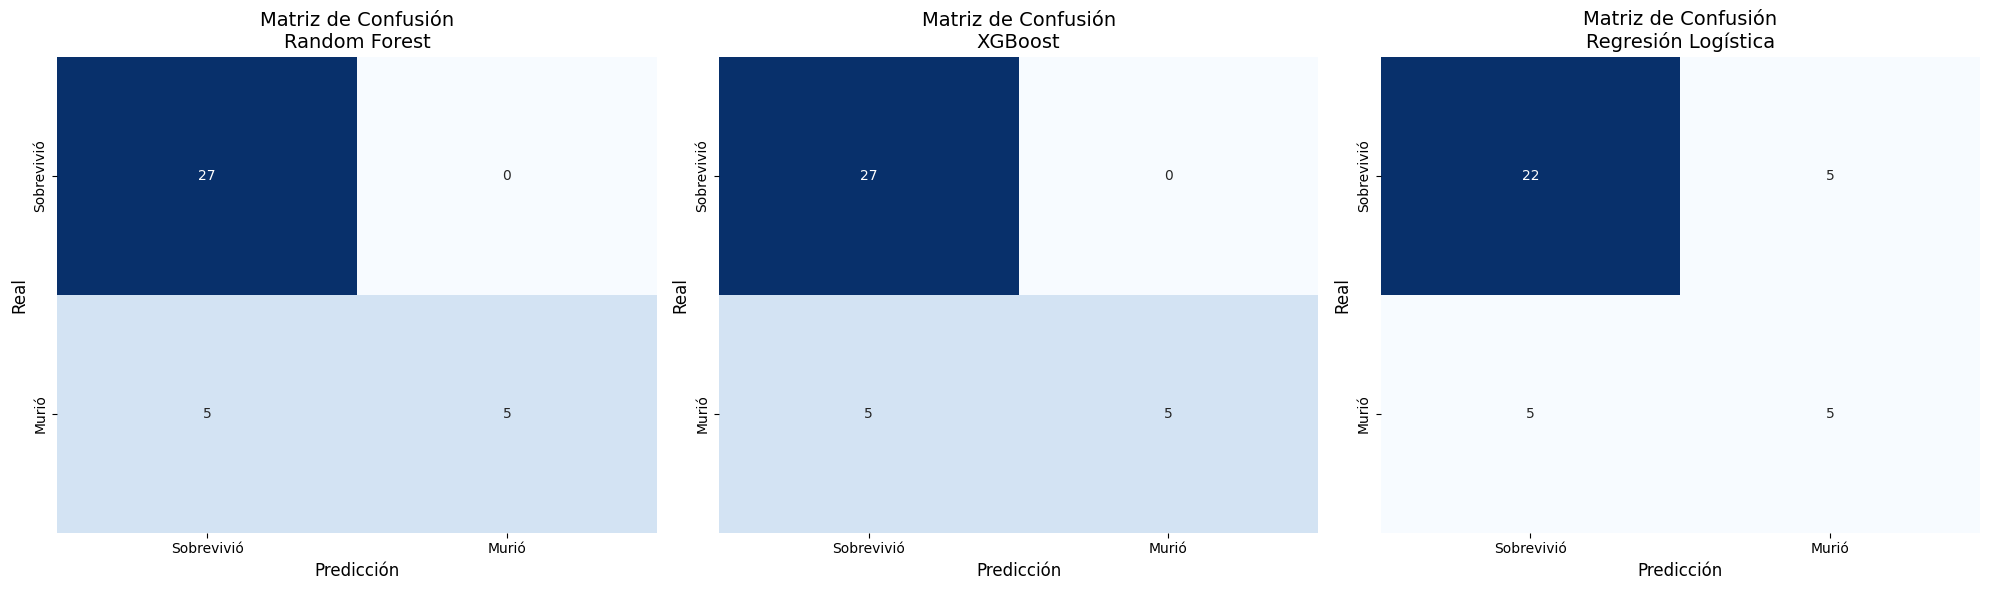

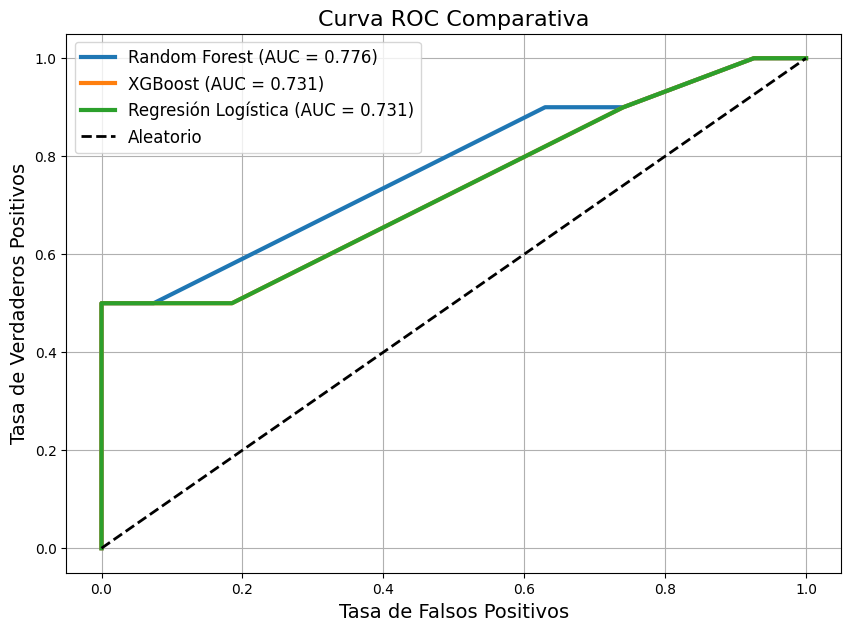

In [ ]:

# ⚙️ Configuration Parameters
CONFIG = {
    'PREDICTORS': [
        'sofa_coag', 'sofa_liver', 'sofa_renal', 'sofa_cv_bp', 'sofa_cv_hr',
        'sofa_cns', 'lactate_score', 'wbc_score', 'fluid_balance_score'
    ],
    'TARGET': 'hospital_expire_flag',
    'MODEL_OUTPUT': 'rf_model_mortality.joblib',
    'PROJECT_ID': 'compelling-weft-455510-b4',
    # Random Forest Hyperparameters
    'RF_N_ESTIMATORS': 100,
    'RF_MAX_DEPTH': None,
    'RF_MIN_SAMPLES_SPLIT': 2,
    'RF_MIN_SAMPLES_LEAF': 1,
    'RANDOM_STATE': 42,
    'TEST_SIZE': 0.2,
    # XGBoost Hyperparameters
    'XGB_N_ESTIMATORS': 100,
    'XGB_LEARNING_RATE': 0.1,
    'XGB_MAX_DEPTH': 3,
    'XGB_SUBSAMPLE': 1.0,
    'XGB_COLSAMPLE_BYTREE': 1.0,
    'XGB_RANDOM_STATE': 42,
    'XGB_USE_LABEL_ENCODER': False,
    'XGB_EVAL_METRIC': 'logloss'
}
# ===============================
# 1. Ejecutar consulta a BigQuery
# ===============================
# Ejecuta la consulta SQL definida en 'query' y carga los datos en un DataFrame
try:
    df = client.query(query).to_dataframe()  # Convierte el resultado de la consulta en un DataFrame
    print("✅ Datos cargados correctamente desde BigQuery\n")
    print(f"📏 Shape of df: {df.shape}") # Imprime dimensiones del DataFrame (filas, columnas)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")  # Muestra el error si la consulta falla
    raise  # Lanza la excepción para detener la ejecución

# ===============================
# 2. Inspección inicial de datos
# ===============================
# Muestra las columnas disponibles y las primeras filas para inspección rápida
print("📋 Columnas disponibles:")
print(df.columns.tolist())  # Lista todas las columnas del DataFrame
print("\n🔍 Primeras filas:")
print(df.head(), "\n")  # Muestra las primeras 5 filas para inspección inicial

# ===============================
# 3. Análisis de valores nulos
# ===============================
# Calcula el porcentaje de valores nulos por columna para detectar datos faltantes
nulos_pct = df.isnull().mean() * 100  # Porcentaje de nulos (media de valores nulos * 100)
print("📉 Porcentaje de valores nulos por columna:")
print(nulos_pct.sort_values(ascending=False).to_string(), "\n")  # Muestra nulos ordenados descendentemente

# ===============================
# 4. Verificar columna objetivo
# ===============================
# Asegura que la columna 'hospital_expire_flag' (objetivo) esté presente para evitar errores
if CONFIG['TARGET'] not in df.columns:
    print(f"❌ Error: '{CONFIG['TARGET']}' no encontrado. Revisa la consulta SQL o unión de tablas.")
    raise KeyError(f"'{CONFIG['TARGET']}' no encontrado. Ajusta la consulta SQL.") # Detiene si falta
else:
    print(f"📊 Distribución '{CONFIG['TARGET']}' antes de limpieza:")
    print(df[CONFIG['TARGET']].value_counts(dropna=False), "\n")  # Muestra distribución incluyendo nulos
    print(f"Valores nulos en '{CONFIG['TARGET']}': {df[CONFIG['TARGET']].isnull().sum()}\n") # Cuenta nulos

# ===============================
# 5. Verificar columnas requeridas
# ===============================
# Asegura que todas las columnas necesarias estén presentes
required_cols = CONFIG['PREDICTORS'] + [CONFIG['TARGET']]
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"❌ Columnas faltantes: {missing_cols}")
    raise ValueError(f"Missing required columns: {missing_cols}") # Detiene si faltan columnas
print(f"✅ Todas las columnas requeridas están presentes: {required_cols}\n")

# ===============================
# 6. Eliminar columnas 100% vacías
# ===============================
# Elimina columnas que no tienen ningún dato (100% nulos) para limpiar el dataset
cols_vacias = nulos_pct[nulos_pct == 100].index.tolist()  # Lista columnas con 100% de valores nulos
if cols_vacias:
    df.drop(columns=cols_vacias, inplace=True)  # Elimina las columnas vacías del DataFrame
    print(f"🗑️ Columnas eliminadas por estar completamente vacías: {cols_vacias}\n")
print(f"📏 Shape of df after removing empty columns: {df.shape}\n")  # Imprime shape actualizado

# ===============================
# 7. Agregar último registro por ingreso ICU
# ===============================
# Agrupa datos por paciente e ingreso ICU y toma el último registro para cada feature
df_clean = df.groupby(['subject_id', 'icustay_id']).agg({
    **{f: 'last' for f in CONFIG['PREDICTORS']},  # Último valor para cada feature
    'sofa_total_extended': 'last',                # Último valor SOFA total
    CONFIG['TARGET']: 'last'                      # Último valor variable objetivo (mortalidad)
}).reset_index()  # Resetea índice para tener un DataFrame limpio
print(f"📏 Shape of df_clean: {df_clean.shape}") # Imprime dimensiones
df_clean.to_csv('sample_data.csv', index=False) # Guarda datos para la app Streamlit
print("💾 Sample data saved to sample_data.csv\n")

# ===============================
# 8. Imputar valores nulos con la media
# ===============================
# Rellena valores faltantes en las características con la media de cada columna
for f in CONFIG['PREDICTORS']:
    if f in df_clean.columns:
        mean_val = df_clean[f].mean()  # Calcula media
        df_clean[f].fillna(mean_val, inplace=True)  # Imputa nulos con media

# ===============================
# 9. Eliminar filas sin variable objetivo
# ===============================
# Elimina filas donde no se tiene el valor de la variable objetivo (mortalidad)
filas_ini = df_clean.shape[0]  # Guarda cantidad inicial de filas
df_clean.dropna(subset=[CONFIG['TARGET']], inplace=True)  # Elimina filas con nulos en objetivo
filas_fin = df_clean.shape[0]  # Cantidad final de filas
print(f"🧹 Filas antes: {filas_ini}, después de limpieza: {filas_fin}\n")

# ===============================
# 10. Verificar balance de clases
# ===============================
# Muestra la proporción de cada clase en la variable objetivo para evaluar balance
dist = df_clean[CONFIG['TARGET']].value_counts(normalize=True) # Proporción normalizada
print("⚖️ Distribución clases (mortalidad):")
print(dist.to_string(), "\n")

# ===============================
# 11. División train/test por sujeto
# ===============================
# Separa los datos en entrenamiento y prueba garantizando que sujetos no se mezclen
subs = df_clean['subject_id'].unique()  # Lista de sujetos únicos
train_subs, test_subs = train_test_split(
    subs, test_size=CONFIG['TEST_SIZE'], random_state=CONFIG['RANDOM_STATE']
)  # 80% train, 20% test

# Filtra el DataFrame para obtener train y test por sujetos
train_df = df_clean[df_clean['subject_id'].isin(train_subs)] # Filtra entrenamiento
test_df = df_clean[df_clean['subject_id'].isin(test_subs)] # Filtra prueba

# Define X (features) e y (objetivo) para ambos conjuntos
X_train = train_df[CONFIG['PREDICTORS']] # Predictores de entrenamiento
y_train = train_df[CONFIG['TARGET']] # Objetivo de entrenamiento
X_test = test_df[CONFIG['PREDICTORS']]  # Predictores de prueba
y_test = test_df[CONFIG['TARGET']] # Objetivo de prueba

# ===============================
# 12. Escalar características
# ===============================
# Normaliza las características para mejorar el entrenamiento de los modelos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # Ajusta y transforma train
X_test_s = scaler.transform(X_test)        # Transforma test con la misma escala
joblib.dump(scaler, 'scaler.joblib') # Guarda escalador para la app Streamlit
print("💾 Scaler saved to scaler.joblib\n")

# ===============================
# 13. Entrenar modelos
# ===============================
# --- Random Forest ---
# Entrena un modelo Random Forest con hiperparámetros definidos
rf = RandomForestClassifier(
    n_estimators=CONFIG['RF_N_ESTIMATORS'],
    max_depth=CONFIG['RF_MAX_DEPTH'],
    min_samples_split=CONFIG['RF_MIN_SAMPLES_SPLIT'],
    min_samples_leaf=CONFIG['RF_MIN_SAMPLES_LEAF'],
    random_state=CONFIG['RANDOM_STATE'],
    class_weight='balanced'# Balancea clases desequilibradas
)
rf.fit(X_train_s, y_train)  # Entrena Random Forest
rf_pred = rf.predict(X_test_s)  # Predice en test
rf_prob = rf.predict_proba(X_test_s)[:, 1]  # Probabilidad clase positiva

# 💾 Save Random Forest Model
joblib.dump(rf, CONFIG['MODEL_OUTPUT']) # Guarda modelo para la app Streamlit
print(f"✅ Random Forest model saved to {CONFIG['MODEL_OUTPUT']}\n")

# 🔄 Load and Verify Model
rf = joblib.load(CONFIG['MODEL_OUTPUT']) # Verifica carga del modelo
print("✅ Random Forest model loaded successfully\n")

# --- XGBoost ---
# Entrena un modelo XGBoost con ajuste para clases desbalanceadas
pos_neg_ratio = (y_train == 0).sum() / (y_train == 1).sum()  # Peso para balancear clases
xgb_model = xgb.XGBClassifier(
    n_estimators=CONFIG['XGB_N_ESTIMATORS'],
    learning_rate=CONFIG['XGB_LEARNING_RATE'],
    max_depth=CONFIG['XGB_MAX_DEPTH'],
    subsample=CONFIG['XGB_SUBSAMPLE'],
    colsample_bytree=CONFIG['XGB_COLSAMPLE_BYTREE'],
    random_state=CONFIG['XGB_RANDOM_STATE'],
    use_label_encoder=CONFIG['XGB_USE_LABEL_ENCODER'],
    eval_metric=CONFIG['XGB_EVAL_METRIC'],
    scale_pos_weight=pos_neg_ratio # Ajusta peso para desbalance
)
xgb_model.fit(X_train_s, y_train)  # Entrena XGBoost
xgb_pred = xgb_model.predict(X_test_s) # Predice en prueba
xgb_prob = xgb_model.predict_proba(X_test_s)[:, 1] # Probabilidades

# --- Regresión Logística ---
# Entrena un modelo de regresión logística con clases balanceadas
logreg = LogisticRegression(
    random_state=CONFIG['RANDOM_STATE'], max_iter=1000, class_weight='balanced'
)
logreg.fit(X_train_s, y_train)  # Entrena regresión logística
logreg_pred = logreg.predict(X_test_s) # Predice en prueba
logreg_prob = logreg.predict_proba(X_test_s)[:, 1] # Probabilidades

# ===============================
# 14. Calcular métricas de evaluación
# ===============================
def calcular_metricas(y_true, y_pred, y_prob):
    """
    Calcula métricas comunes para evaluación de clasificación binaria:
    - Accuracy, F1 Score, Precision, Recall, Specificity, AUC ROC, Matthews CC, Cohen Kappa, Balanced Accuracy, Log Loss, Brier Score
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()  # Matriz de confusión
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'Specificity': tn / (tn + fp) if (tn + fp) > 0 else np.nan,
        'AUC ROC': roc_auc_score(y_true, y_prob) if len(np.unique(y_true)) > 1 else np.nan,
        'Matthews CC': matthews_corrcoef(y_true, y_pred) if len(np.unique(y_true)) > 1 else np.nan,
        'Cohen Kappa': cohen_kappa_score(y_true, y_pred) if len(np.unique(y_true)) > 1 else np.nan,
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred) if len(np.unique(y_true)) > 1 else np.nan,
        'Log Loss': log_loss(y_true, y_prob, labels=[0, 1]) if len(np.unique(y_true)) > 1 else np.nan,
        'Brier Score': brier_score_loss(y_true, y_prob)
    }

# ===============================
# 15. Generar tabla de resultados
# ===============================
# Compara métricas de todos los modelos en una tabla
modelos = {
    'Random Forest': (rf_pred, rf_prob),
    'XGBoost': (xgb_pred, xgb_prob),
    'Regresión Logística': (logreg_pred, logreg_prob)
}

resultados = []
for nombre, (pred, prob) in modelos.items():
    met = calcular_metricas(y_test, pred, prob)  # Calcula métricas para cada modelo
    met['Modelo'] = nombre
    resultados.append(met)

df_resultados = pd.DataFrame(resultados).set_index('Modelo') # Crea tabla

print("📈 Resultados de Modelos:\n")
display(df_resultados.style.background_gradient(cmap='Blues').format("{:.4f}")) # Muestra tabla con formato

# ===============================
# 16. Mostrar matrices de confusión
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, (nombre, (pred, _)) in zip(axes, modelos.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Sobrevivió', 'Murió'],
                yticklabels=['Sobrevivió', 'Murió'], ax=ax) # Dibuja heatmap
    ax.set_title(f'Matriz de Confusión\n{nombre}', fontsize=14)
    ax.set_xlabel('Predicción', fontsize=12)
    ax.set_ylabel('Real', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrices.png') # Guarda imagen
plt.show()

# ===============================
# 17. Curva ROC comparativa
# ===============================
# Genera y compara curvas ROC para todos los modelos
plt.figure(figsize=(10, 7))
for nombre, (_, prob) in modelos.items():
    fpr, tpr, _ = roc_curve(y_test, prob) # Calcula curva ROC
    auc = roc_auc_score(y_test, prob) # Calcula AUC
    plt.plot(fpr, tpr, lw=3, label=f'{nombre} (AUC = {auc:.3f})') # Dibuja curva

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatorio') # Línea base
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC Comparativa', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('roc_curve.png') # Guarda imagen
plt.show()

#Desarrollo del sistema
#####Desarollamos todos los archivos requeridos para subirlos a Hugging Face Space (app.py, sample_data.csv, rf_model_mortality.joblib, scaler.joblib, requirements.txt)



In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

# Importar librerías necesarias para la aplicación Streamlit
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import os

# ⚙️ Configuración de parámetros de la aplicación
CONFIG = {
    'PREDICTORS': [
        'sofa_coag', 'sofa_liver', 'sofa_renal', 'sofa_cv_bp', 'sofa_cv_hr',
        'sofa_cns', 'lactate_score', 'wbc_score', 'fluid_balance_score'
    ],
    'TARGET': 'hospital_expire_flag',
    'MODEL_PATH': 'rf_model_mortality.joblib',
    'SCALER_PATH': 'scaler.joblib'
}

# Configurar la página de Streamlit (DEBE SER LA PRIMERA LLAMADA)
st.set_page_config(page_title="Predicción de Mortalidad por Sepsis", layout="wide")
st.title("Aplicación de Predicción de Mortalidad por Sepsis")

# 📊 Sección para cargar datos
st.header("Cargar Datos")
if st.button("Cargar Datos de Ejemplo"):
    try:
        df_clean = pd.read_csv('sample_data.csv')
        st.session_state['df'] = df_clean
        st.success("¡Datos cargados exitosamente! ✅")
        st.dataframe(df_clean.head())
    except Exception as e:
        st.error(f"Error al cargar datos: {e} ❌")

# 🔍 Sección para seleccionar predictores
st.header("Seleccionar Predictores")
selected_predictors = st.multiselect(
    "Elige las variables para predecir",
    options=CONFIG['PREDICTORS'],
    default=CONFIG['PREDICTORS']
)

# 🤖 Sección para cargar modelo y escalador
st.header("Modelo")
try:
    model = joblib.load(CONFIG['MODEL_PATH'])
    scaler = joblib.load(CONFIG['SCALER_PATH'])
    st.success("Modelo y escalador cargados exitosamente ✅")
except Exception as e:
    st.error(f"Error al cargar modelo o escalador: {e} ❌")

# 🚀 Sección para realizar predicciones
if st.button("Predecir"):
    if 'df' in st.session_state and selected_predictors:
        try:
            X = st.session_state['df'][selected_predictors]
            y_true = st.session_state['df'][CONFIG['TARGET']]
            X_scaled = scaler.transform(X)
            predictions = model.predict(X_scaled)
            probabilities = model.predict_proba(X_scaled)[:, 1]
            st.session_state['df']['Prediction'] = predictions
            st.session_state['df']['Probability'] = probabilities
            st.dataframe(st.session_state['df'][['subject_id', 'icustay_id', 'Prediction', 'Probability']])

            # 📈 Calcular métricas de evaluación
            metrics = {
                'Precision': precision_score(y_true, predictions),
                'Recall': recall_score(y_true, predictions),
                'F1-Score': f1_score(y_true, predictions),
                'AUC-ROC': auc(*roc_curve(y_true, probabilities)[:2])
            }
            st.subheader("Métricas de Evaluación")
            st.json(metrics)

            # 📊 Gráfico de barras para métricas
            fig_metrics = go.Figure(data=[
                go.Bar(x=list(metrics.keys()), y=list(metrics.values()), marker_color='#1f77b4')
            ])
            fig_metrics.update_layout(
                title="Métricas de Rendimiento del Modelo",
                xaxis_title="Métrica",
                yaxis_title="Puntuación"
            )
            st.plotly_chart(fig_metrics)

            # 📉 Curva ROC
            fpr, tpr, _ = roc_curve(y_true, probabilities)
            fig_roc = go.Figure()
            fig_roc.add_trace(go.Scatter(
                x=fpr, y=tpr, mode='lines', name=f'Curva ROC (AUC = {metrics["AUC-ROC"]:.2f})'
            ))
            fig_roc.add_trace(go.Scatter(
                x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Aleatorio'
            ))
            fig_roc.update_layout(
                title='Curva ROC',
                xaxis_title='Tasa de Falsos Positivos',
                yaxis_title='Tasa de Verdaderos Positivos'
            )
            st.plotly_chart(fig_roc)

            # 🚨 Alerta para pacientes de alto riesgo
            high_risk = st.session_state['df'][probabilities > 0.7]
            if not high_risk.empty:
                st.warning(f"¡Alerta: {len(high_risk)} pacientes con >70% de riesgo de mortalidad! ⚠️")
                st.dataframe(high_risk[['subject_id', 'icustay_id', 'Probability']])
        except Exception as e:
            st.error(f"Error al realizar predicciones: {e} ❌")
    else:
        st.error("Por favor, carga datos y selecciona predictores primero. ⚠️")

Writing app.py


In [ ]:
%%writefile requirements.txt
streamlit
pandas
scikit-learn
joblib
plotly

Overwriting requirements.txt


https://huggingface.co/spaces/Irene082/SepsisMortalityPrediction

https://github.com/Ire082/Sepsis-Mortality-Prediction